## 1. Setup and preparation

In [2]:
# Use one time to install the required packages
# !pip3 install -r requirements.txt

import matplotlib.pyplot as plt
import numpy as np
import feature_scaling as fs
import logistic_regression as lr

# These are Jupyter Notebook specific instructions that make sure that
# you can make changes in your imports and your imported methods and
# classes are automatically reloaded;
# be aware that you need to re-initialize objects when you've made
# changes to their class definitions!
%load_ext autoreload
%autoreload 2


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\akash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
      --------------------------------------- 0.2/15.8 MB 7.3 MB/s eta 0:00:03
     - -------------------------------------- 0.5/15.8 MB 5.6 MB/s eta 0:00:03
     - -------------------------------------- 0.8/15.8 MB 6.2 MB/s eta 0:00:03
     -- ------------------------------------- 1.0/15.8 MB 5.9 MB/s eta 0:00:03
     -- ------------------------------------- 1.1/15.8 MB 5.1 MB/s eta 0:00:03
     --- ------------------------------------ 1.3/15.8 MB 4.6 MB/s eta 0:00:04
     --- ------------------------------------ 1.4/15.8 MB 4.7 MB/s eta 0:00:04
     --- ------------------------------------ 1.5/15.8 MB 4.0 MB/s eta 0:00:04
     ---- ----------------------------------- 1.7/15.8 MB 3.9 MB/s eta 0:00:04
     ---- ----------------------------------- 1.9/15.8 MB 3.8 MB/s eta 0:00:04
     ----- ---------------------------------- 2.0/15.8 MB 3.9 MB/s eta 0:00:04
     ----- ---------------------------------- 2.3/15.8 MB 3

In [10]:
 # Download the Fashion-MNIST dataset one time
# import mnist_downloader

# make sure that you don't accidentally add the download folder
# to your git (it *should* already be in the .gitignore, so you should be fine)
# download_folder = "./mnist/"
# mnist_downloader.download_and_unzip(download_folder) 

mnist\train-images-idx3-ubyte.gz already exists, skipping ...
mnist\train-images-idx3-ubyte already exists, skipping ... 
mnist\train-labels-idx1-ubyte.gz already exists, skipping ...
mnist\train-labels-idx1-ubyte already exists, skipping ... 
mnist\t10k-images-idx3-ubyte.gz already exists, skipping ...
mnist\t10k-images-idx3-ubyte already exists, skipping ... 
mnist\t10k-labels-idx1-ubyte.gz already exists, skipping ...
mnist\t10k-labels-idx1-ubyte already exists, skipping ... 


In [4]:
from mnist import MNIST

mndata = MNIST('mnist', return_type="numpy")

images_train, labels_train = mndata.load_training()
images_validation, labels_validation = mndata.load_testing()

## 2. Data visualization

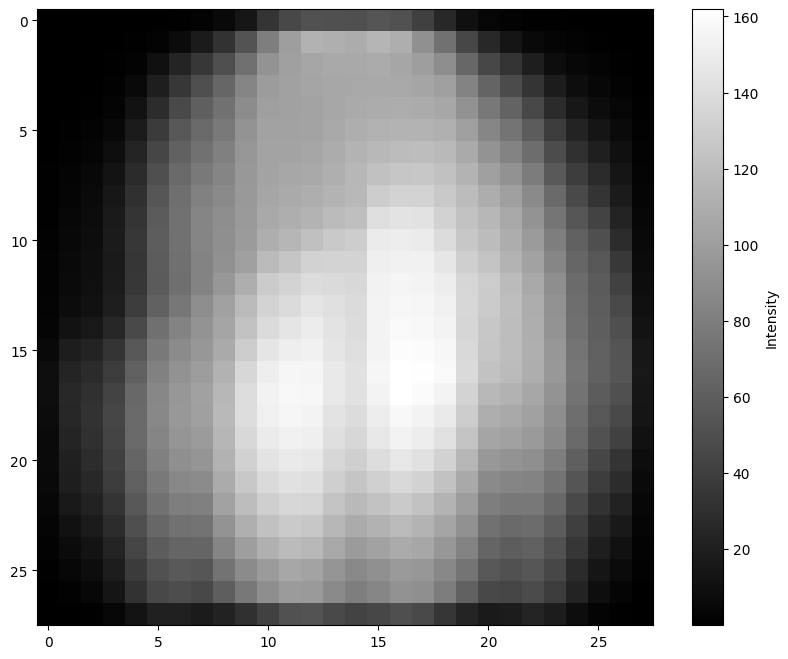

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

l = images_train.shape[0]
overlayed = np.sum(images_train, axis=0) 
overlayed = overlayed.reshape(28, 28) / l

masked_array = np.ma.masked_where(overlayed == 0, overlayed)
cmap = plt.cm.grey
cmap.set_bad(color='red')
im = ax.imshow(masked_array, cmap=cmap)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Intensity')

## 3. Data preparation

### 3.1. Data scaling


In [6]:
# Instantiate the scaler
scaler = fs.NormalScaler()

# Fit the scaler to the training data
scaler.fit(images_train)

# Transform the training data
images_train_scaled = scaler.transform(images_train)


In [7]:
def train_item_detector(item_class, images, labels):
    targets = (labels == item_class).astype(int)

    initial_thetas = np.random.rand(images.shape[1])

    trained_thetas, error_history = lr.gradient_descent_logistic_regression(images, targets, initial_thetas, alpha=1, iterations=100)
    
    return trained_thetas, error_history

### Todo visualize error histories of all 10 classes in a graph

# 4. Training

In [8]:
trained_thetas = [None] * 10
error_histories = [None] * 10
for item_class in range(10):
    trained_thetas[item_class], error_histories[item_class] = train_item_detector(item_class, images_train_scaled, labels_train)
    print("Final error for {}: {}".format(item_class, error_histories[item_class][-1])) 

Final error for 0: 0.177932810473165
Final error for 1: 0.06697645766283143
Final error for 2: 0.2945449378317022
Final error for 3: 0.14886516084779305
Final error for 4: 1.7345614970340983
Final error for 5: 0.12739225264936072
Final error for 6: 1.1318806603535736
Final error for 7: 0.1224881216402395
Final error for 8: 0.10941389189503252
Final error for 9: 0.09203887099182442


In [9]:
def classify(images, thetas_list):
    images_with_bias = np.c_[np.ones(len(images)), images]
    predictions = np.empty((10, len(images)))
    for digit, thetas in enumerate(thetas_list):
        h_validation = lr.logistic_regression(images_with_bias, thetas)
        predictions[digit] = h_validation
    classifications = predictions.argmax(axis=0)
    return classifications